<a href="https://colab.research.google.com/github/BKKITYT/Market-Segment-Analysis/blob/main/McDonaldsCaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mcdonalds.csv to mcdonalds (5).csv


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
data = pd.read_csv('mcdonalds.csv')

In [ ]:
variable_names = data.columns
print("Variable Names:")
print(variable_names)

# Get the sample size (number of rows) and number of columns
sample_size, num_columns = data.shape
print("Sample Size:", sample_size)
print("Number of Columns:", num_columns)

# Show the first three rows of the dataset
print("First Three Rows:")
print(data.head(3))

Variable Names:
Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')
Sample Size: 1453
Number of Columns: 15
First Three Rows:
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [ ]:
dataarray = np.array(data)

In [ ]:
MD_x = data.iloc[:, 0:11].values

In [ ]:
MD_x

array([['No', 'Yes', 'No', ..., 'Yes', 'No', 'No'],
       ['Yes', 'Yes', 'No', ..., 'Yes', 'No', 'No'],
       ['No', 'Yes', 'Yes', ..., 'Yes', 'Yes', 'No'],
       ...,
       ['Yes', 'Yes', 'No', ..., 'Yes', 'No', 'No'],
       ['Yes', 'Yes', 'No', ..., 'No', 'Yes', 'No'],
       ['No', 'Yes', 'No', ..., 'Yes', 'No', 'Yes']], dtype=object)

In [ ]:
MD_x = (MD_x == "Yes").astype(int)

average_values = MD_x.mean(axis=0)

# Round the average values to two decimal places
average_values = [round(value, 2) for value in average_values]

print("Average Values for Transformed Segmentation Variables:")
print(average_values)

Average Values for Transformed Segmentation Variables:
[0.55, 0.91, 0.09, 0.87, 0.53, 0.9, 0.6, 0.64, 0.36, 0.2, 0.24]


In [ ]:
MD_x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [ ]:
MD_pca = PCA()
MD_pca.fit(MD_x)

# Display the summary
explained_variance_ratio = MD_pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
n_components = len(cumulative_variance_ratio)

print("Standard deviation (Eigenvalues):", MD_pca.singular_values_)
print("Proportion of Variance Explained:", explained_variance_ratio)
print("Cumulative Proportion of Variance Explained:", cumulative_variance_ratio)
print("Number of Components:", n_components)

Standard deviation (Eigenvalues): [28.8 23.1 19.2 15.2 12.9 11.8 11.  10.5 10.1  9.5  9. ]
Proportion of Variance Explained: [0.3 0.2 0.1 0.1 0.1 0.1 0.  0.  0.  0.  0. ]
Cumulative Proportion of Variance Explained: [0.3 0.5 0.6 0.7 0.8 0.8 0.9 0.9 0.9 1.  1. ]
Number of Components: 11


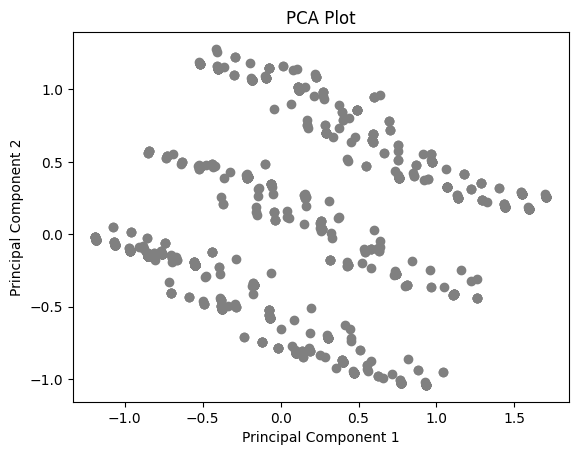

PCA Axes (Eigenvalues):
[[-0.5 -0.2 -0.   0.1  0.3 -0.1 -0.3 -0.5  0.3 -0.2  0.4]
 [ 0.4  0.   0.  -0.  -0.1 -0.1 -0.6  0.3  0.6  0.1 -0.1]
 [-0.3 -0.1 -0.  -0.3 -0.8 -0.1 -0.1 -0.3  0.   0.2 -0.1]
 [ 0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.   0.1  0.8  0.4]
 [-0.3  0.3  0.1 -0.1  0.4  0.1 -0.1 -0.2 -0.   0.3 -0.7]
 [ 0.2 -0.3 -0.4 -0.4  0.2 -0.6 -0.1 -0.1 -0.3 -0.2 -0.2]
 [-0.3 -0.1  0.7 -0.4  0.  -0.1 -0.   0.4 -0.1 -0.3 -0. ]
 [ 0.  -0.1  0.4  0.6 -0.1 -0.6  0.1 -0.1  0.   0.2 -0.2]
 [ 0.6 -0.   0.4 -0.2 -0.   0.2  0.1 -0.6  0.1 -0.2 -0.1]
 [-0.1 -0.7 -0.1 -0.   0.   0.2  0.4  0.1  0.5 -0.  -0.3]
 [ 0.  -0.5  0.1  0.3  0.   0.3 -0.5  0.  -0.5  0.2 -0. ]]


In [ ]:
import matplotlib.pyplot as plt
# Plot the PCA results
principalComponents = MD_pca.fit_transform(MD_x)
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c='grey')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot')
plt.show()

# Print the PCA axes (eigenvalues)
print("PCA Axes (Eigenvalues):")
print(MD_pca.components_)

In [ ]:
relabel_map = {old_label: new_label for new_label, old_label in enumerate(np.unique(cluster_results))}

In [ ]:
relabel_map

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7}

In [ ]:
cluster_results

[array([1, 0, 0, ..., 0, 0, 1], dtype=int32),
 array([0, 1, 1, ..., 1, 2, 0], dtype=int32),
 array([0, 2, 2, ..., 2, 1, 0], dtype=int32),
 array([2, 1, 3, ..., 3, 0, 4], dtype=int32),
 array([5, 0, 4, ..., 0, 3, 2], dtype=int32),
 array([2, 5, 3, ..., 1, 6, 1], dtype=int32),
 array([2, 1, 3, ..., 1, 6, 7], dtype=int32)]

In [ ]:
relabeled_clusters = []
for cluster_labels in cluster_results:
    relabeled_cluster = [relabel_map[label] for label in cluster_labels]
    relabeled_clusters.append(relabeled_cluster)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

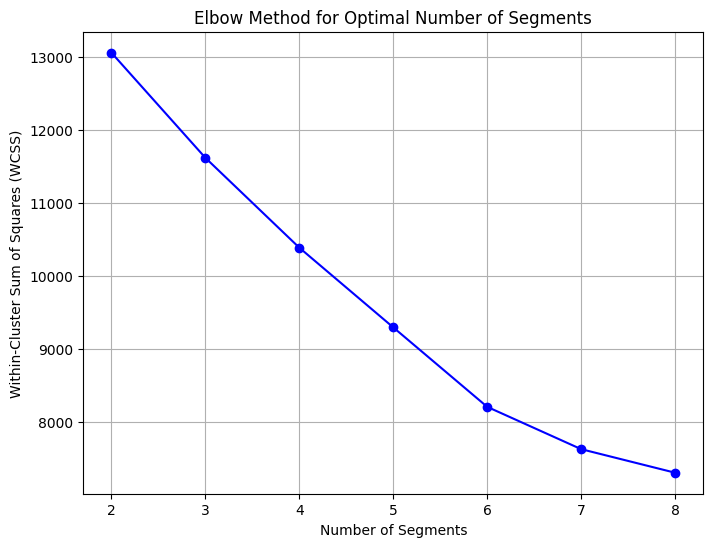

In [ ]:
wcss = []

for cluster_labels in relabeled_clusters:
    kmeans = KMeans(n_clusters=len(np.unique(cluster_labels)))
    kmeans.fit(MD_x_scaled)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8, 6))
plt.plot(k_range, wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Segments')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal Number of Segments')
plt.grid()
plt.show()